<a href="https://colab.research.google.com/github/Swathi-Thandavarayan/STORE-DATA-PREDICTION/blob/main/STORE_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict the department-wide sales for each store for the following year.

Model the effects of markdowns on holiday weeks.

Provide recommended actions based on the insights drawn, with prioritisation placed on largest business impact


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [75]:
pip install DateTime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 6.0 MB/s eta 0:00:00


#DATA IMPORT

In [3]:
path1 = '/content/Features_data_set.csv'
path2 = '/content/sales_data_set.csv'
path3 = '/content/stores_data_set.csv'
data_feature = pd.read_csv(path1)
data_sales = pd.read_csv(path2)
data_stores = pd.read_csv(path3)

In [4]:
data_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
data_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Date          68267 non-null  object 
 3   Weekly_Sales  68267 non-null  float64
 4   IsHoliday     68266 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [8]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#DATA MERGING

In [10]:
merged_df = pd.merge(data_feature, data_sales, on=['Store','Date','IsHoliday'])
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68261,7,26/10/2012,42.53,3.686,2818.42,24.03,2.97,343.26,1064.56,199.219532,7.557,False,90,13211.75
68262,7,26/10/2012,42.53,3.686,2818.42,24.03,2.97,343.26,1064.56,199.219532,7.557,False,91,9435.59
68263,7,26/10/2012,42.53,3.686,2818.42,24.03,2.97,343.26,1064.56,199.219532,7.557,False,92,25090.81
68264,7,26/10/2012,42.53,3.686,2818.42,24.03,2.97,343.26,1064.56,199.219532,7.557,False,93,1583.42


In [11]:
stores_data = pd.merge(merged_df, data_stores, on='Store')
stores_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [12]:
stores_data.shape

(68266, 16)

In [13]:
stores_data.isnull().sum()

Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1       43849
MarkDown2       48750
MarkDown3       45349
MarkDown4       44182
MarkDown5       43849
CPI                 0
Unemployment        0
IsHoliday           0
Dept                0
Weekly_Sales        0
Type                0
Size                0
dtype: int64

# DATA CLEANING

##stores_data

shape
dtype
null
describe
duplicates

In [14]:
stores_data.shape

(68266, 16)

In [15]:
stores_data.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday        object
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
dtype: object

In [16]:
stores_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size'],
      dtype='object')

###store

In [17]:
stores_data.Store.dtype

dtype('int64')

In [18]:
stores_data.Store.isnull().sum()

0

In [19]:
stores_data.Store.describe()

count    68266.000000
mean         3.955688
std          2.008139
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Store, dtype: float64

In [20]:
stores_data.Store.nunique()

7

In [21]:
stores_data.Store.value_counts()

Store
4    10272
1    10244
2    10238
6    10211
7     9266
3     9036
5     8999
Name: count, dtype: int64

IQR

In [22]:
q3 = stores_data.Store.quantile(.75)
q1 = stores_data.Store.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(12.0, -4.0)

###Date

In [23]:
stores_data.Date.value_counts()

Date
23/12/2011    493
25/11/2011    491
30/12/2011    490
17/02/2012    489
19/02/2010    489
             ... 
05/08/2011    467
08/07/2011    467
29/07/2011    465
16/07/2010    465
22/07/2011    464
Name: count, Length: 143, dtype: int64

In [24]:
##
#stores_data.Date.loc[(stores_data.Date == 05/02/2010), :]

In [80]:
stores_data['Date'] = pd.to_datetime(stores_data['Date'], format='%d/%m/%Y')

In [81]:
stores_data.Date.dtype

dtype('<M8[ns]')

In [25]:
stores_data.Date.isnull().sum()

0

In [26]:
stores_data.Date.describe()

count          68266
unique           143
top       23/12/2011
freq             493
Name: Date, dtype: object

###Temperature

In [27]:
stores_data.Temperature.isnull().sum()

0

In [28]:
stores_data.Temperature.describe()

count    68266.000000
mean        64.155584
std         17.937090
min         -2.060000
25%         51.450000
50%         66.830000
75%         79.780000
max         93.340000
Name: Temperature, dtype: float64

In [29]:
q3 = stores_data.Temperature.quantile(.75)
q1 = stores_data.Temperature.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold, upper_threshold

(8.955000000000005, 122.275)

In [30]:
sum(stores_data.Temperature < lower_threshold )

131

In [31]:
stores_data.loc[(stores_data.Temperature < lower_threshold),:]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
62399,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,1,8976.04,B,70713
62400,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,2,21568.46,B,70713
62401,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,3,7555.18,B,70713
62402,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,4,15306.89,B,70713
62403,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,5,12835.06,B,70713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65616,7,13/01/2012,7.46,3.077,3167.26,5926.48,0.54,191.84,1415.69,196.733052,8.256,False,90,20026.04,B,70713
65617,7,13/01/2012,7.46,3.077,3167.26,5926.48,0.54,191.84,1415.69,196.733052,8.256,False,91,15316.53,B,70713
65618,7,13/01/2012,7.46,3.077,3167.26,5926.48,0.54,191.84,1415.69,196.733052,8.256,False,92,34372.75,B,70713
65619,7,13/01/2012,7.46,3.077,3167.26,5926.48,0.54,191.84,1415.69,196.733052,8.256,False,93,2317.76,B,70713


In [32]:
# since there are values below the lower threshold (only 7 vlalues hence impute)
stores_data.Temperature = stores_data.Temperature.clip(lower_threshold, upper_threshold)

In [33]:
stores_data.Temperature.describe()

count    68266.000000
mean        64.167657
std         17.896557
min          8.955000
25%         51.450000
50%         66.830000
75%         79.780000
max         93.340000
Name: Temperature, dtype: float64

###Fuel_Price

In [34]:
stores_data.Fuel_Price.isnull().sum()

0

In [35]:
stores_data.Fuel_Price.describe()

count    68266.000000
mean         3.221776
std          0.424521
min          2.514000
25%          2.762000
50%          3.290000
75%          3.594000
max          3.936000
Name: Fuel_Price, dtype: float64

In [36]:
q3 = stores_data.Fuel_Price.quantile(.75)
q1 = stores_data.Fuel_Price.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(1.5140000000000002, 4.842)

In [37]:
##from google.colab import drive
#drive.mount('/content/drive')

hence no outliers

###MarkDown1

In [38]:
stores_data.MarkDown1.isnull().sum()

43849

In [39]:
stores_data.MarkDown1.dtype

dtype('float64')

In [40]:
stores_data.MarkDown1.value_counts()

MarkDown1
561.45      74
429.03      74
2971.04     74
2725.36     74
12635.19    74
            ..
2592.37     61
2297.32     61
2696.67     61
1649.56     60
2046.93     60
Name: count, Length: 357, dtype: int64

In [41]:
stores_data.MarkDown1.fillna(0, inplace = True)
stores_data.MarkDown2.fillna(0, inplace = True)
stores_data.MarkDown3.fillna(0, inplace = True)
stores_data.MarkDown4.fillna(0, inplace = True)
stores_data.MarkDown5.fillna(0, inplace = True)

###CPI

In [42]:
stores_data.CPI.dtype

dtype('float64')

In [43]:
stores_data.CPI.value_counts()

CPI
126.496258    75
220.041741    74
126.606645    74
221.864499    74
126.471333    74
              ..
193.711525    60
210.989120    60
222.390005    60
214.973044    60
218.546705    60
Name: count, Length: 1001, dtype: int64

In [44]:
stores_data.CPI.describe()

count    68266.000000
mean       200.534751
std         31.517808
min        126.064000
25%        196.872892
50%        213.382049
75%        219.195983
max        226.987364
Name: CPI, dtype: float64

In [45]:
q3 = stores_data.CPI.quantile(.75)
q1 = stores_data.CPI.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(163.3882562, 252.6806186)

In [46]:
stores_data.CPI.loc[stores_data.CPI < lower_threshold].value_counts().sum()

10272

###Unemployment

In [47]:
stores_data.Unemployment.dtype

dtype('float64')

###IsHoliday

In [48]:
stores_data.IsHoliday.value_counts()

IsHoliday
False    63444
True      4822
Name: count, dtype: int64

In [49]:
stores_data.IsHoliday.dtype

dtype('O')

In [50]:
stores_data.IsHoliday = stores_data.IsHoliday.astype('bool')

In [51]:
stores_data.IsHoliday.dtype

dtype('bool')

###Dept                

In [52]:
stores_data.Dept.dtype

dtype('int64')

In [53]:
stores_data.Dept.nunique()

78

###Weekly_Sales

In [54]:
stores_data.Weekly_Sales.dtype

dtype('float64')

###Type

In [83]:
stores_data.Type.dtype

dtype('O')

In [84]:
stores_data['Type'] = stores_data['Type'].astype(str)

In [86]:
stores_data.Type.dtype

dtype('O')

In [87]:
stores_data.Type.unique()

array(['A', 'B'], dtype=object)

###Size

#DATA VISUALISATION

In [69]:
# Dependent - Weekly_Sales
# Supervised Regression

continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type",   "IsHoliday", "Dept"]

#string_columns = stores_data.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
#numeric_columns = stores_data.select_dtypes(include=['int64',"float64"]).columns

###catogorical columns

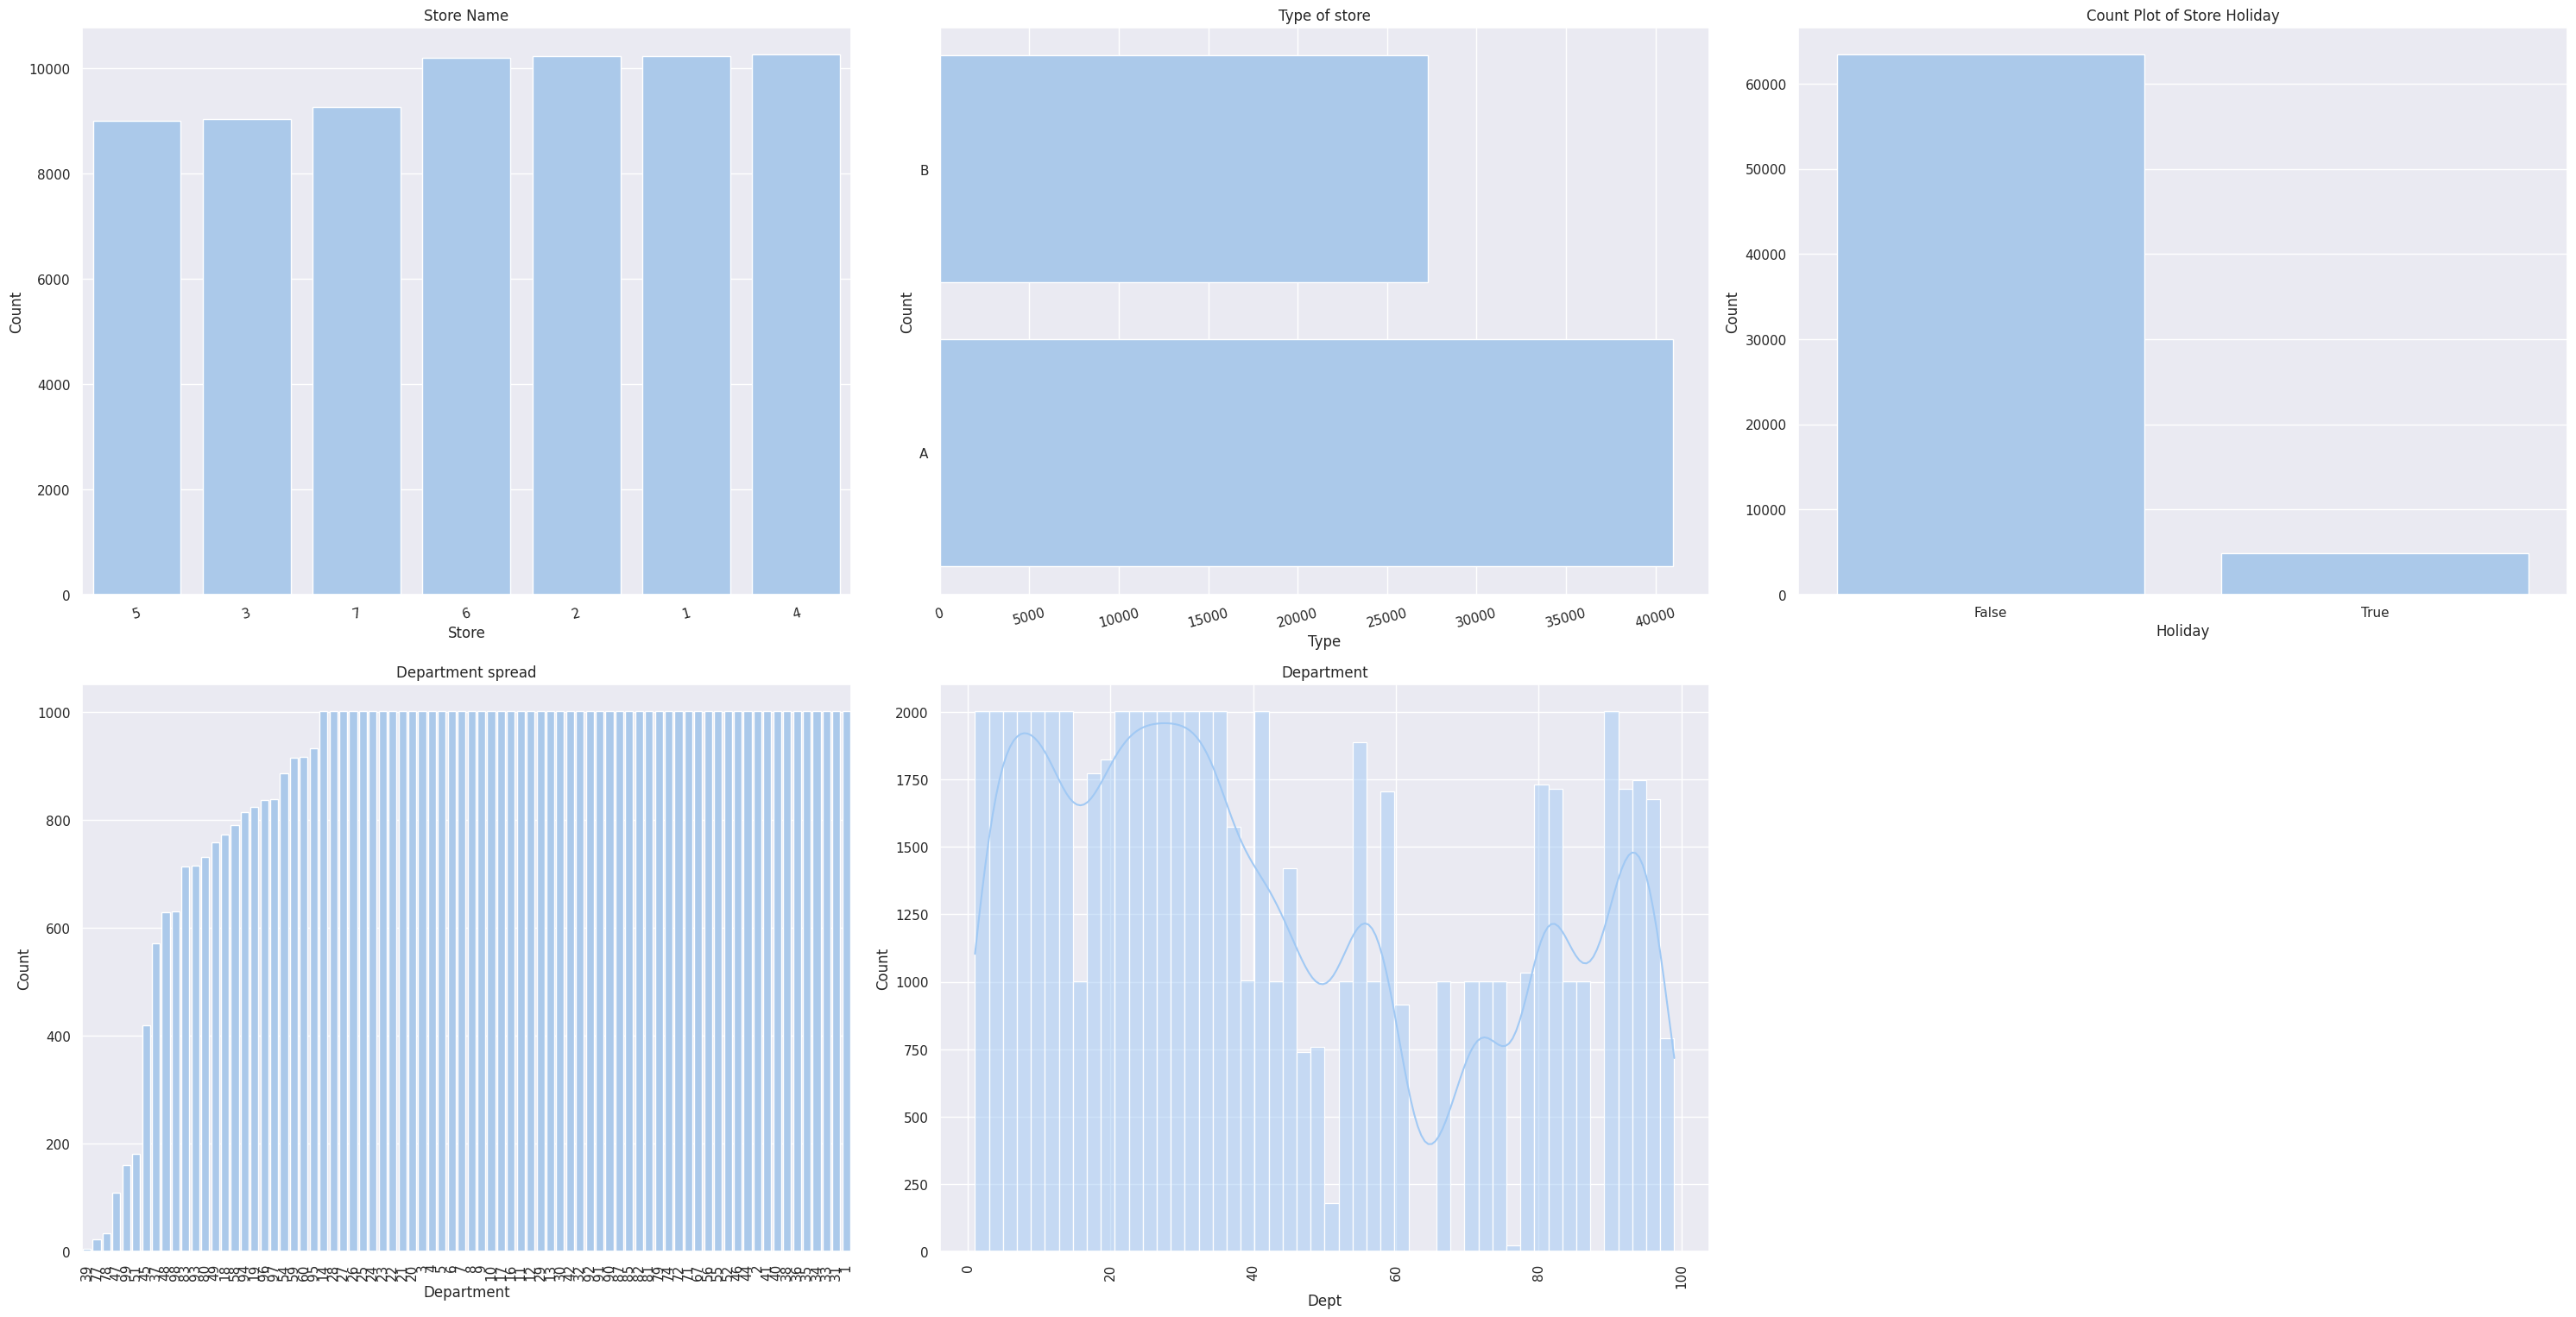

In [67]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,30))

plt.subplot(431)
sns.countplot(x = 'Store', data = stores_data,order=stores_data['Store'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('Count')
plt.title('Store Name')


plt.subplot(432)
sns.countplot(stores_data['Type'],order=stores_data['Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type of store')

plt.subplot(433)
sns.countplot(x='IsHoliday', data=stores_data)
plt.title('Count Plot of Store Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.subplot(434)
sns.countplot(x='Dept', data=stores_data,order=stores_data['Dept'].value_counts().index[::-1])
plt.title('Department spread')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.subplot(435)
sns.histplot(data=stores_data, x=stores_data.Dept, kde=True, bins=50)
plt.xticks(rotation=90)
plt.xlabel('Dept')
plt.ylabel('Count')
plt.title('Department')

#plt.show()
plt.tight_layout()

####interpretations
1. type A store are higher

###continous columns

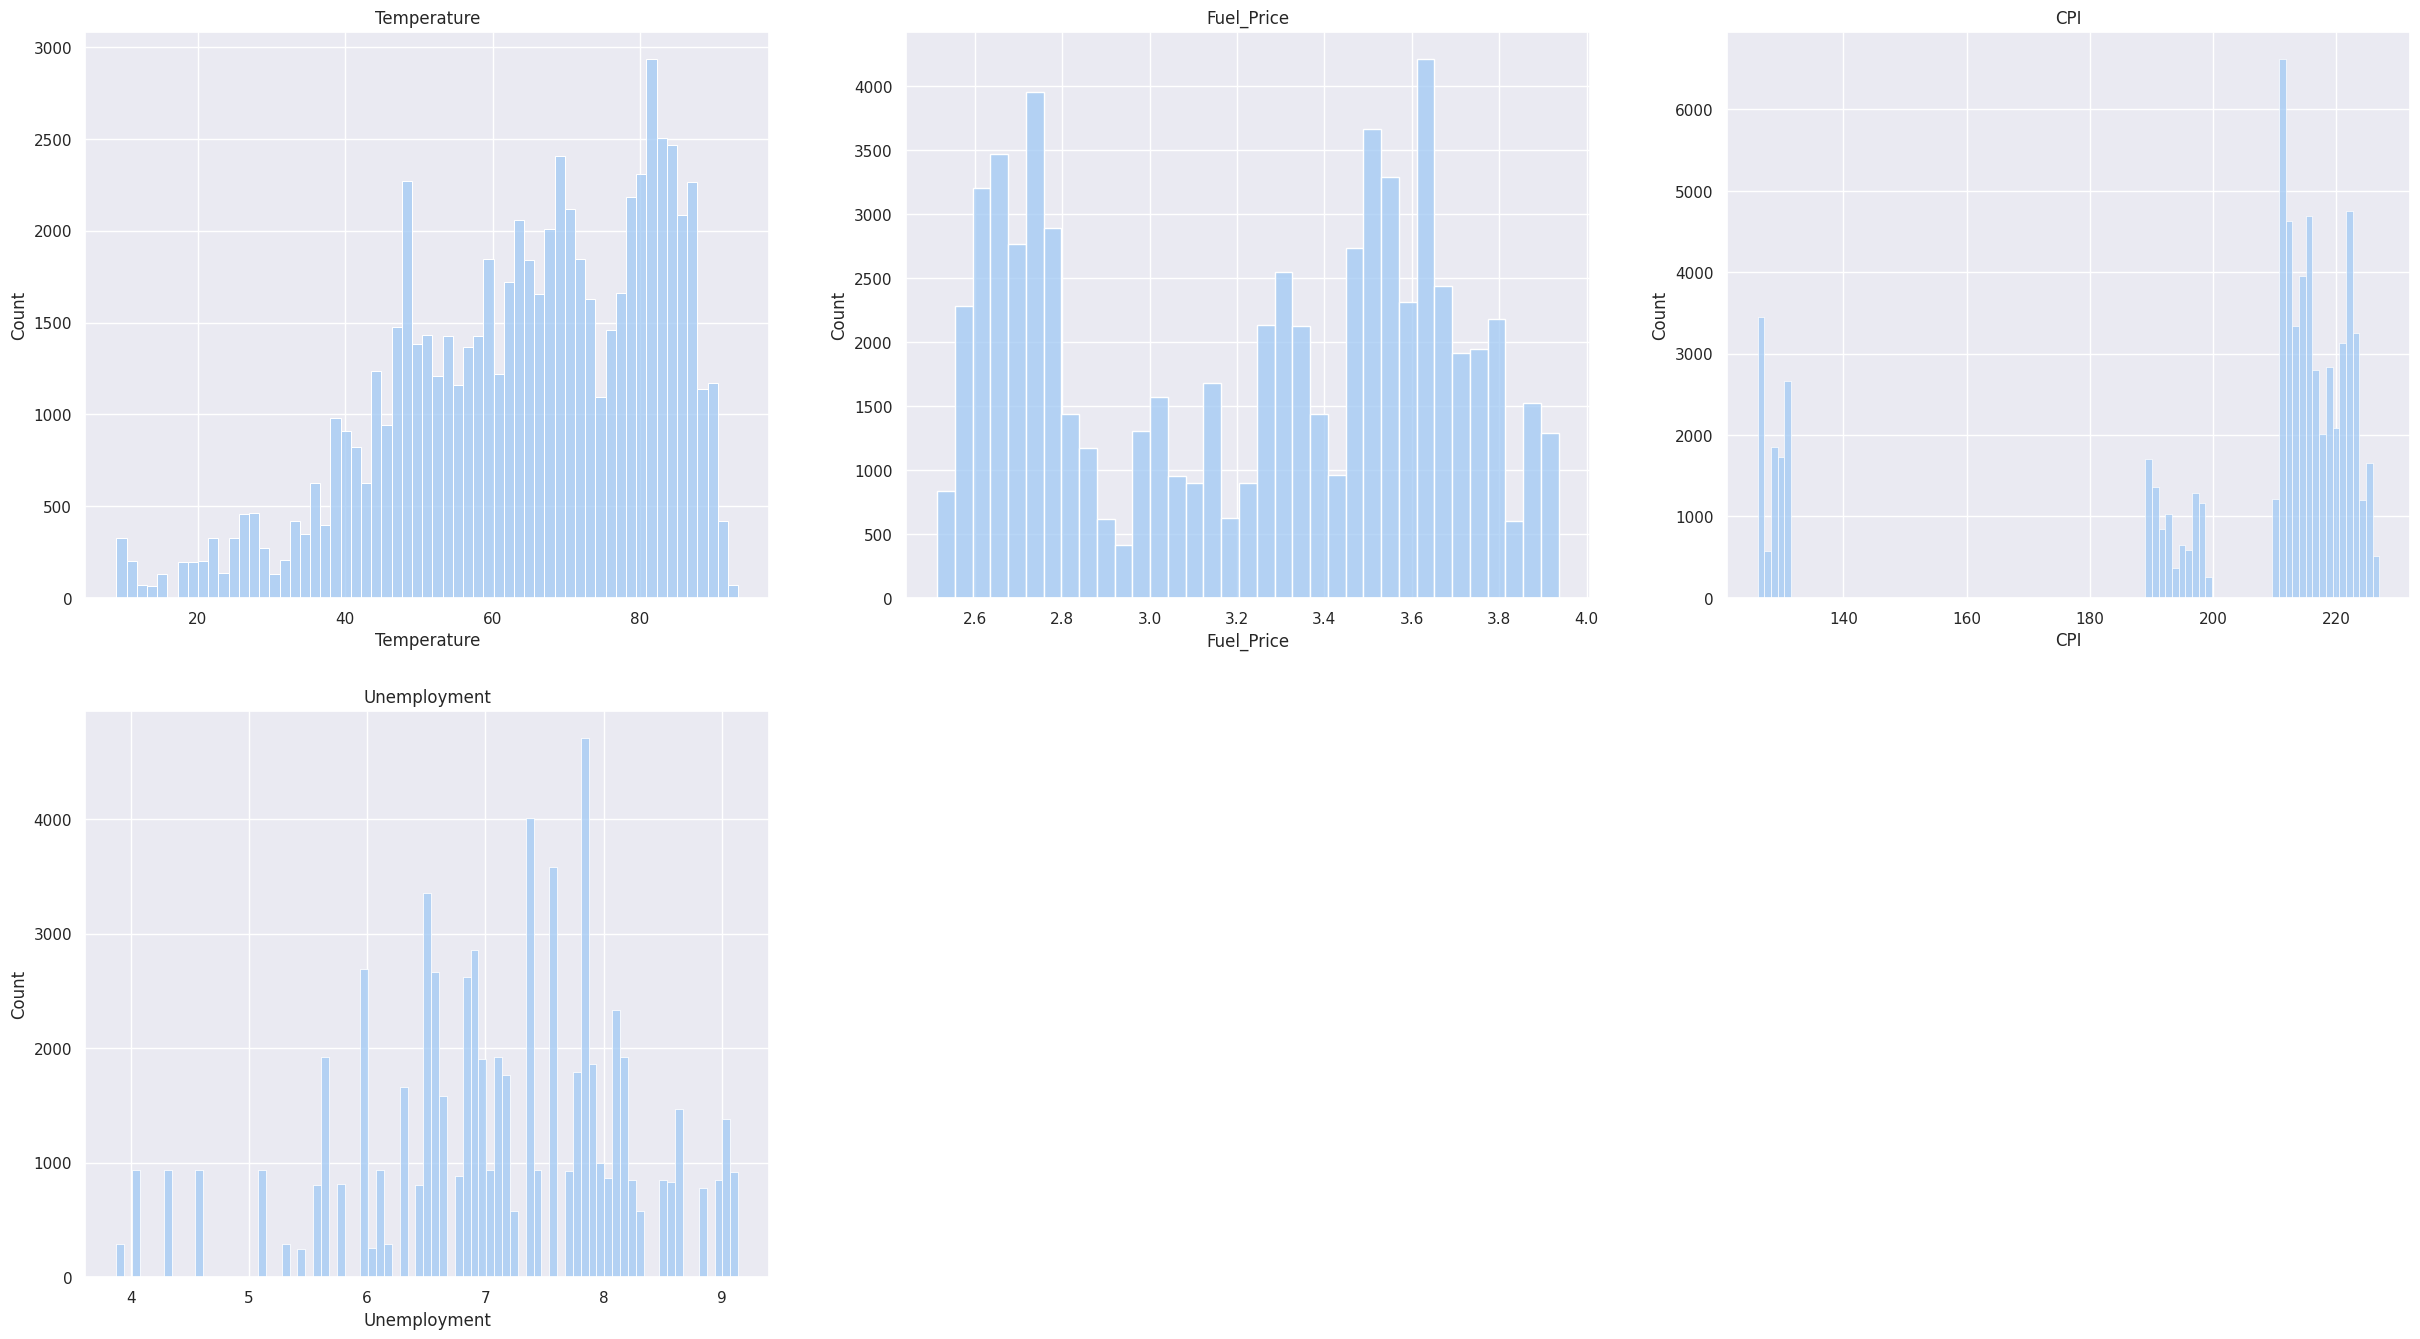

<Figure size 640x480 with 0 Axes>

In [73]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))
plt.subplot(331)
sns.histplot(stores_data['Temperature']) #sns.histplot(data=penguins, y="flipper_length_mm")
plt.title('Temperature')


plt.subplot(332)
sns.histplot(stores_data['Fuel_Price'])
plt.title('Fuel_Price')

plt.subplot(333)
sns.histplot(stores_data['CPI'])
plt.title('CPI')

plt.subplot(334)
sns.histplot(stores_data['Unemployment'])
plt.title('Unemployment')


plt.show()
plt.tight_layout()

###FEATURE VS TARGET

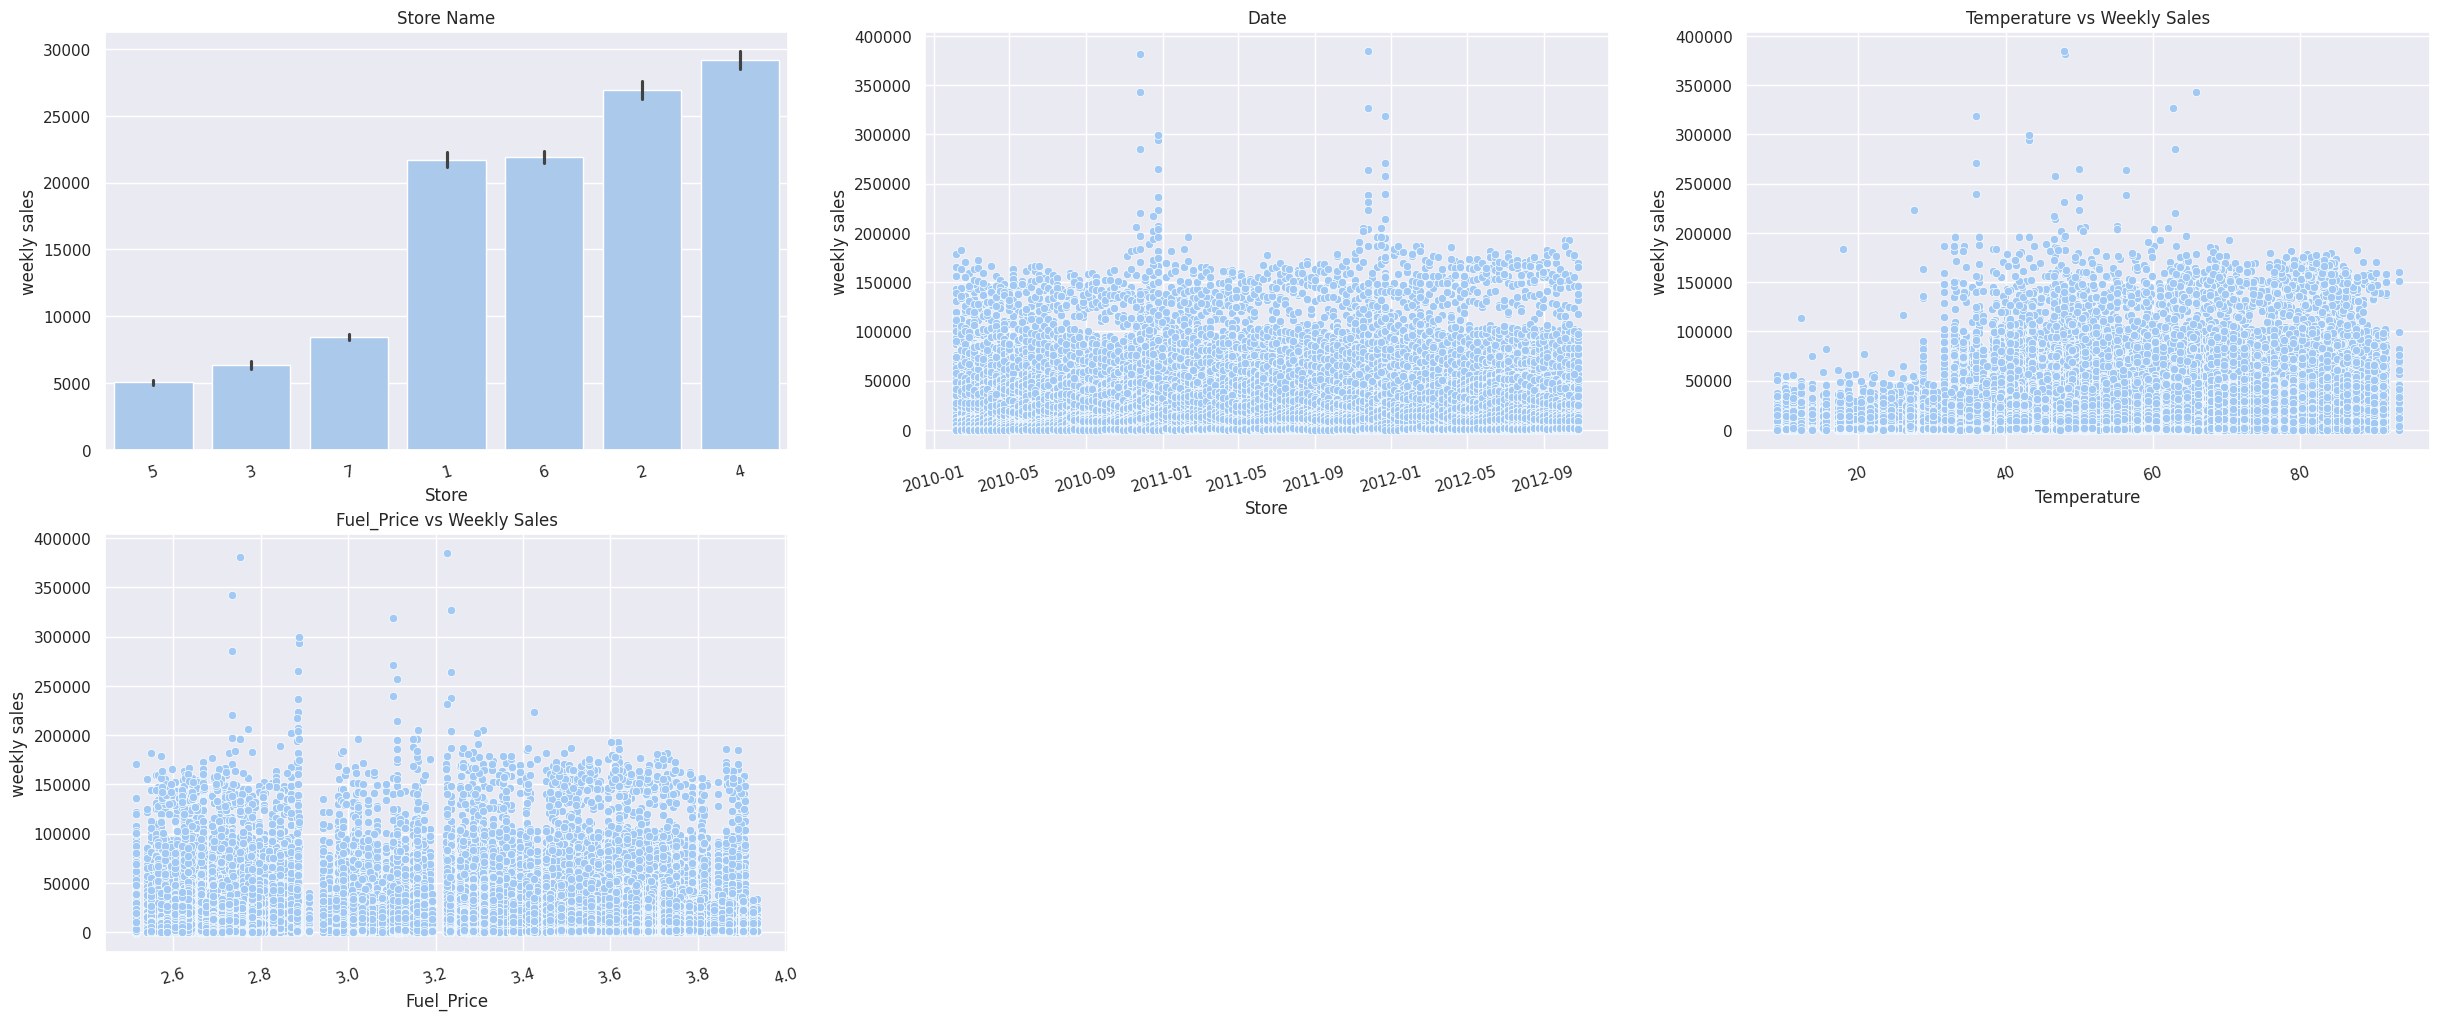

<Figure size 640x480 with 0 Axes>

In [106]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(431)
sns.barplot(x = 'Store',y = 'Weekly_Sales', data=stores_data, order = stores_data.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['Store'])
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('weekly sales')
plt.title('Store Name')

plt.subplot(432)
sns.scatterplot(x = 'Date',y = 'Weekly_Sales', data = stores_data)
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('weekly sales')
plt.title('Date')


plt.subplot(433)
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales', data = stores_data)
plt.xticks(rotation=15)
plt.xlabel('Temperature')
plt.ylabel('weekly sales')
plt.title('Temperature vs Weekly Sales')

plt.subplot(434)
sns.scatterplot(x = 'Fuel_Price',y = 'Weekly_Sales', data = stores_data)
plt.xticks(rotation=15)
plt.xlabel('Fuel_Price')
plt.ylabel('weekly sales')
plt.title('Fuel_Price vs Weekly Sales')


plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Store Name')

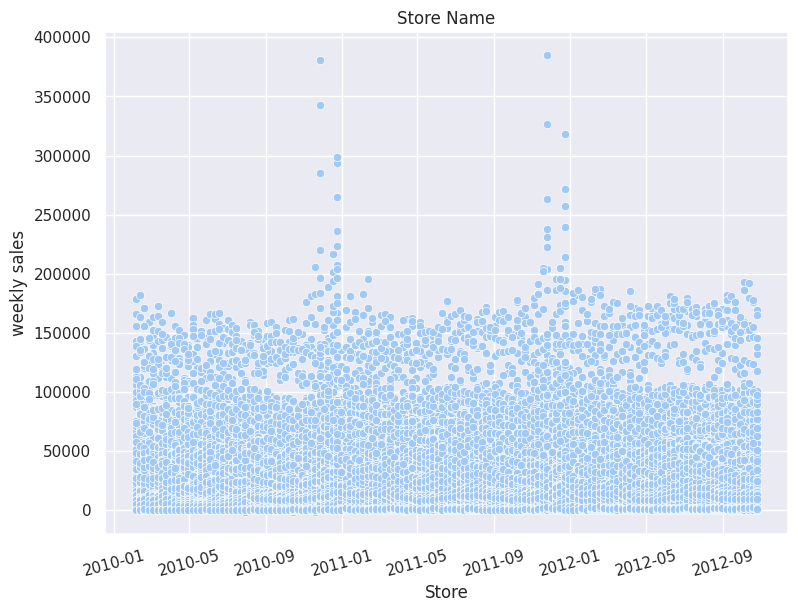

In [101]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,30))

plt.subplot(431)
sns.scatterplot(x = 'Date',y = 'Weekly_Sales', data = stores_data)
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('weekly sales')
plt.title('Date')

#CORR

In [82]:
stores_data.corr()

ValueError: could not convert string to float: 'A'